In [1]:
# Podatkovno rudarjenje ocena vrednosti hiš

# Priprava podatkov

In [2]:
import numpy as np
import operator
import matplotlib.pyplot as plt

vsi_podatki = np.loadtxt('data/train.csv', delimiter=",", skiprows=1,dtype=np.str,encoding="UTF8")

stevilo_soseske = dict()
cene_prodaj = dict()
povprecne_cene = dict()

In [15]:
from csv import DictReader

sale_price_gr_liv_area = []
sale_price_year_built = []
id_qlt_loc = []
reader = DictReader(open('data/train.csv', 'rt', encoding='utf-8'))
for row in reader:
    sale_price_gr_liv_area.append([int(row["SalePrice"]),int(row["GrLivArea"]),int(row["Id"])])
    sale_price_year_built.append([int(row["SalePrice"]),int(row["YearBuilt"])])
    id_qlt_loc.append([int(row["Id"]),int(row["OverallQual"]),row["Neighborhood"], row["OverallCond"]])

In [4]:
# 12 soseska 
# 80 cene

for i in vsi_podatki:
    if i[12] in stevilo_soseske:
        stevilo_soseske[i[12]] += 1
    else:
        stevilo_soseske[i[12]] = 1
        
    if i[12] in cene_prodaj:
        cene_prodaj[i[12]] += int(i[80])
    else:
        cene_prodaj[i[12]] = int(i[80])

for i in cene_prodaj:
    povprecne_cene[i] = cene_prodaj[i]/stevilo_soseske[i]   
    
cene_sort = sorted(povprecne_cene.items())
sortirano = sorted([[c, povp] for povp, c in cene_sort])

naselja_sortirana_po_ceni=np.array(sortirano)
naselja_sortirana_po_ceni.shape

(25, 2)

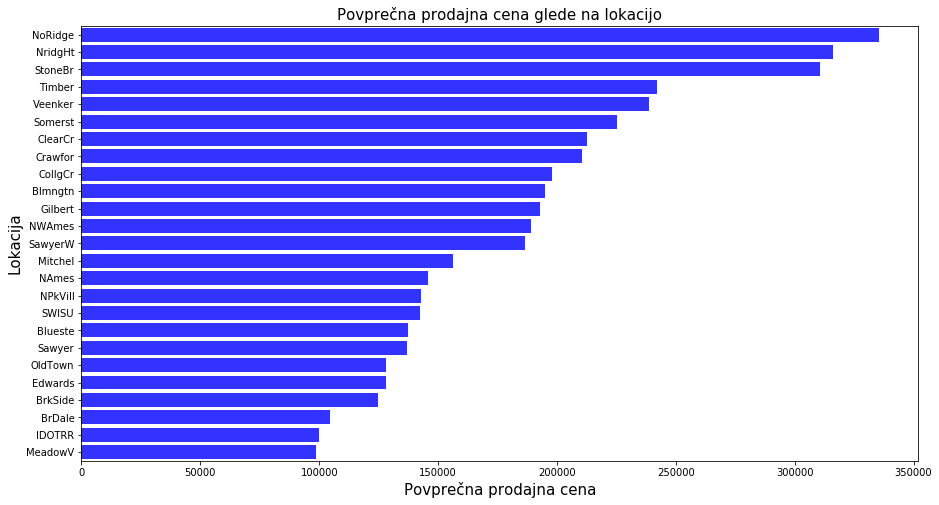

In [5]:
'''
m = naselja_sortirana_po_ceni[:,0].astype('float')
x = range(len(naselja_sortirana_po_ceni[:,1]))
fig=plt.figure(figsize=(20, 12), dpi= 85, facecolor='w', edgecolor='k')
plt.bar(x, m, align='center')
plt.xlim(-0.5, len(naselja_sortirana_po_ceni[:,1])-0.5)
plt.xticks(x)
plt.gca().set_xticklabels(naselja_sortirana_po_ceni[:,1], rotation=90);
plt.title('Povprečna prodajna cena glede na lokacijo', fontsize=15)
plt.xlabel('Lokacija', fontsize=15)
plt.ylabel('Povprečna prodajna cena', fontsize=15);
plt.show();
'''
plt.figure(figsize=(15,8))
x=naselja_sortirana_po_ceni[:,0].astype(float)
y=naselja_sortirana_po_ceni[:,1]
plt.barh(y,x,align='center', alpha=0.8 , color='b')
plt.ylim(-0.5, len(y)-0.5)
plt.title('Povprečna prodajna cena glede na lokacijo', fontsize=15)
plt.xlabel('Povprečna prodajna cena', fontsize=15);
plt.ylabel('Lokacija', fontsize=15)
plt.show();

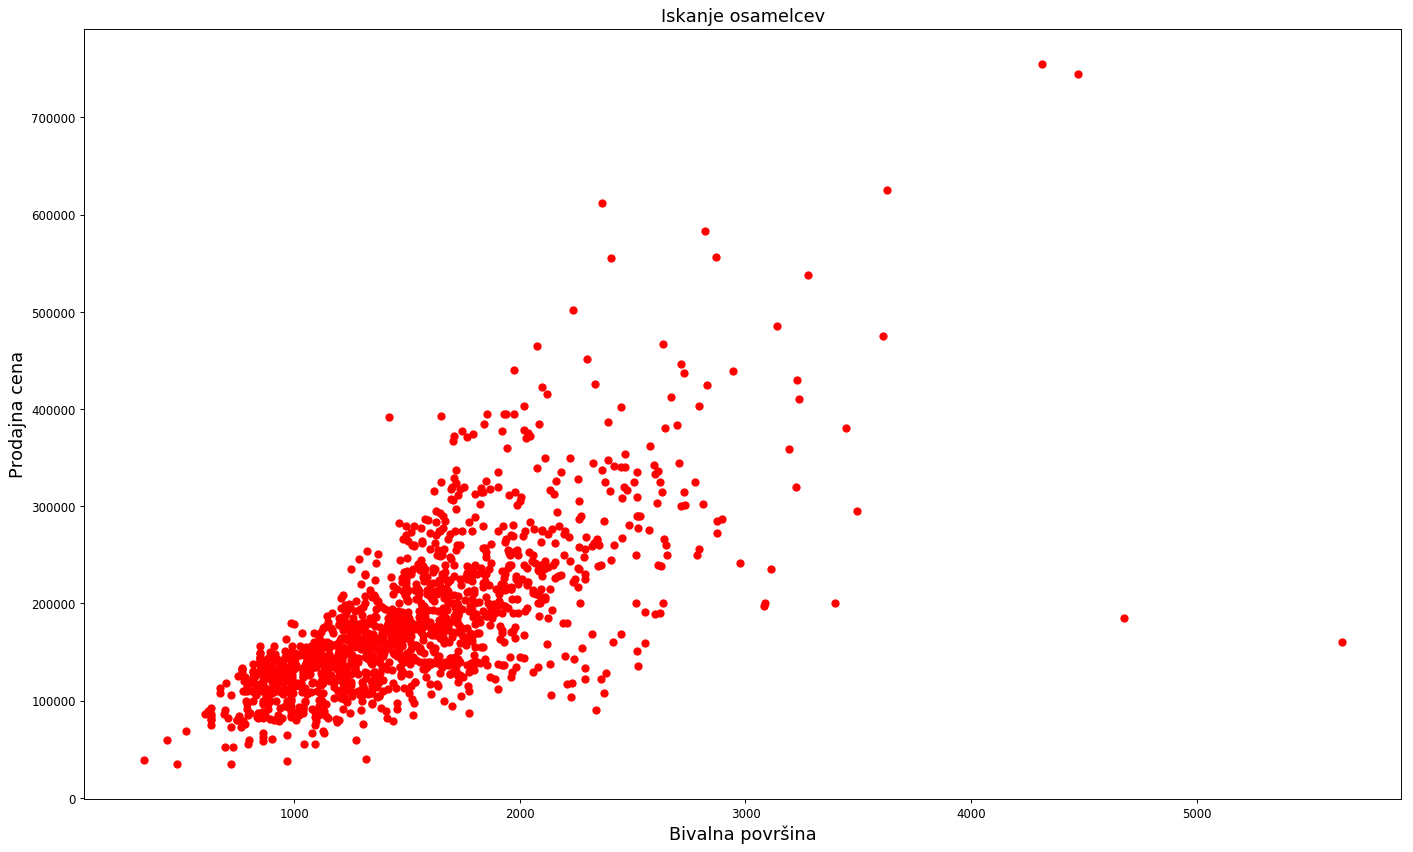

In [6]:
#iskanje najcenejših hiš glede na kvadraturo bivalnih prostorov. Osamelcev

data = np.array(sale_price_gr_liv_area)
x = data[:, 1]    # cena
y = data[:, 0]    # površina

fig=plt.figure(figsize=(20, 12), dpi= 85, facecolor='W', edgecolor='k')
plt.scatter(x, y, color="R")
plt.ylabel('Prodajna cena', fontsize=15)
plt.xlabel('Bivalna površina', fontsize=15)
plt.title('Iskanje osamelcev', fontsize=15)
plt.show();

In [7]:
#analiza osamelcev
data[data[:,1]>4500,2]


array([ 524, 1299])

In [8]:
vsi_podatki[vsi_podatki[:,0]==str(524),]

array([['524', '60', 'RL', '130', '40094', 'Pave', 'NA', 'IR1', 'Bnk',
        'AllPub', 'Inside', 'Gtl', 'Edwards', 'PosN', 'PosN', '1Fam',
        '2Story', '10', '5', '2007', '2008', 'Hip', 'CompShg', 'CemntBd',
        'CmentBd', 'Stone', '762', 'Ex', 'TA', 'PConc', 'Ex', 'TA', 'Gd',
        'GLQ', '2260', 'Unf', '0', '878', '3138', 'GasA', 'Ex', 'Y',
        'SBrkr', '3138', '1538', '0', '4676', '1', '0', '3', '1', '3',
        '1', 'Ex', '11', 'Typ', '1', 'Gd', 'BuiltIn', '2007', 'Fin', '3',
        '884', 'TA', 'TA', 'Y', '208', '406', '0', '0', '0', '0', 'NA',
        'NA', 'NA', '0', '10', '2007', 'New', 'Partial', '184750']],
      dtype='<U7')

In [9]:
vsi_podatki[vsi_podatki[:,0]==str(1299),]

array([['1299', '60', 'RL', '313', '63887', 'Pave', 'NA', 'IR3', 'Bnk',
        'AllPub', 'Corner', 'Gtl', 'Edwards', 'Feedr', 'Norm', '1Fam',
        '2Story', '10', '5', '2008', '2008', 'Hip', 'ClyTile', 'Stucco',
        'Stucco', 'Stone', '796', 'Ex', 'TA', 'PConc', 'Ex', 'TA', 'Gd',
        'GLQ', '5644', 'Unf', '0', '466', '6110', 'GasA', 'Ex', 'Y',
        'SBrkr', '4692', '950', '0', '5642', '2', '0', '2', '1', '3',
        '1', 'Ex', '12', 'Typ', '3', 'Gd', 'Attchd', '2008', 'Fin', '2',
        '1418', 'TA', 'TA', 'Y', '214', '292', '0', '0', '0', '480',
        'Gd', 'NA', 'NA', '0', '1', '2008', 'New', 'Partial', '160000']],
      dtype='<U7')

In [16]:
data2= np.array(id_qlt_loc)


In [17]:
#parametra kvaliteta hiše in naselje
data2[data2[:,0]==str(524),]

array([['524', '10', 'Edwards', '5']], dtype='<U11')

In [18]:
data2[data2[:,0]==str(1299),]

array([['1299', '10', 'Edwards', '5']], dtype='<U11')

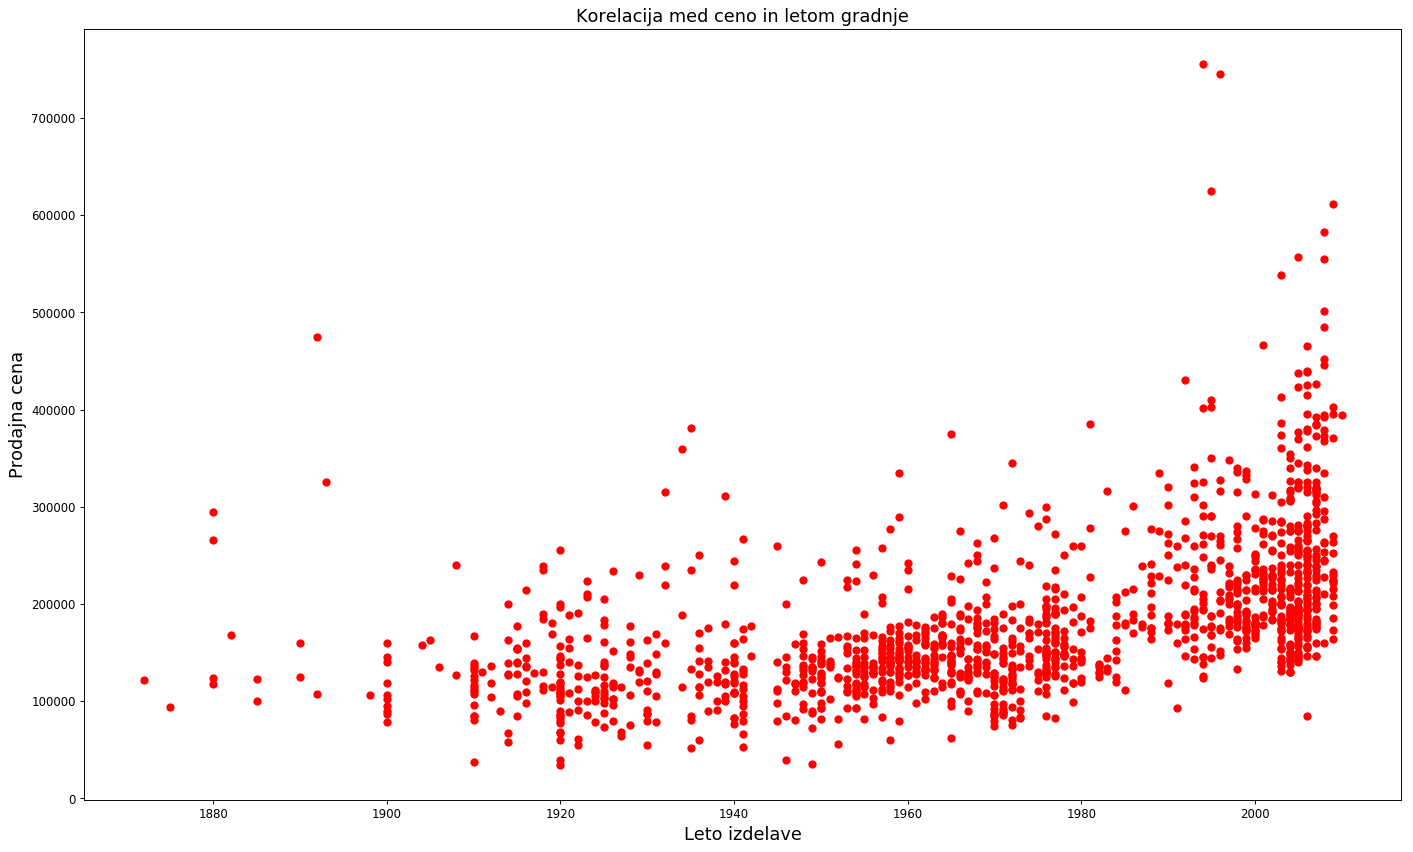

In [13]:
#Korelacija med ceno in letom gradnje
np_SP_YB= np.array(sale_price_year_built)
#np_SP_YB[:,1] leto
#np_SP_YB[:,0] cene
fig=plt.figure(figsize=(20, 12), dpi= 85, facecolor='W', edgecolor='k')
plt.scatter(np_SP_YB[:,1], np_SP_YB[:,0], color="R")
plt.ylabel('Prodajna cena', fontsize=15)
plt.xlabel('Leto izdelave', fontsize=15)
plt.title('Korelacija med ceno in letom gradnje', fontsize=15)
plt.show();


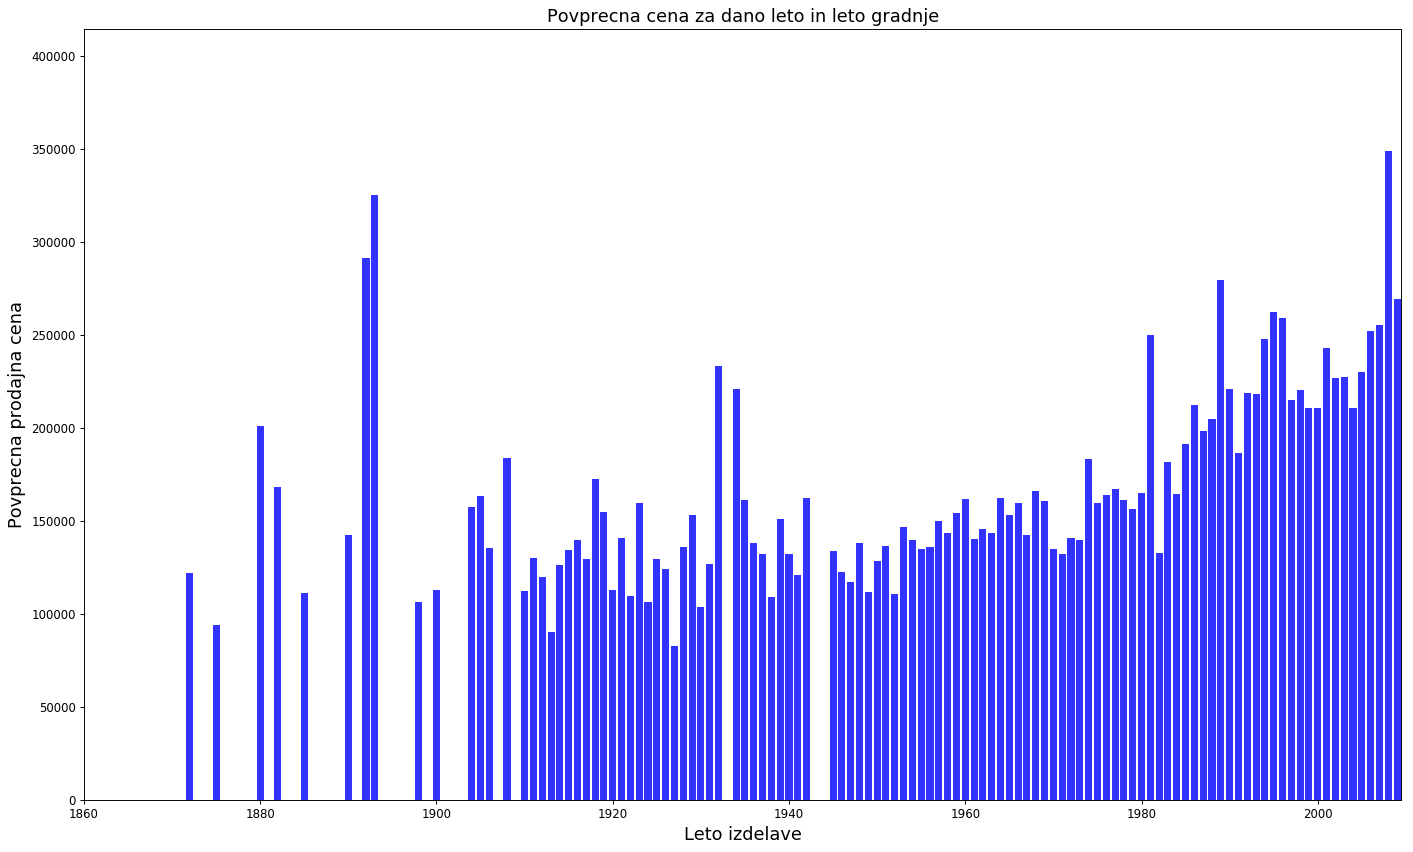

In [14]:
#Korelacija med  povprecno ceno za dano leto in letom gradnje
leto_gradnje = dict((el,0) for el in np_SP_YB[:,1])
for year in leto_gradnje.keys():
    leto_gradnje[year] = np.mean(np_SP_YB[ np_SP_YB[:,1] == year, 0:1 ])
fig=plt.figure(figsize=(20, 12), dpi= 85, facecolor='W', edgecolor='k')
#plt.scatter(leto_gradnje.keys(), leto_gradnje.values(), color="R")
plt.bar(leto_gradnje.keys(),leto_gradnje.values(),align='center', alpha=0.8 , color='b')
plt.ylabel('Povprecna prodajna cena', fontsize=15)
plt.xlabel('Leto izdelave', fontsize=15)
plt.xlim(1860, max(leto_gradnje.keys())-0.5)
plt.title('Povprecna cena za dano leto in leto gradnje', fontsize=15)
plt.show();
